<a href="https://colab.research.google.com/github/Tandrew43/Tandrew43/blob/main/Pizza%3FPizza!csvfile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import csv
from datetime import datetime, timedelta

# Random datetime generator
def random_datetime_within_year():
    start_date = datetime(datetime.now().year, 1, 1)
    end_date = datetime(datetime.now().year, 12, 31, 23, 59)
    return start_date + (end_date - start_date) * random.random()

class Product:
    def __init__(self, industry, name, price):
        self.industry = industry
        self.name = name
        self.price = price

    def __str__(self):
        return f"{self.name} pizza (${self.price:.2f})"

def generate_product(ingredient, price_dict):
    ingredients = [random.choice(word_list) for word_list in ingredient]
    name = " ".join(ingredients)
    total_price = sum(price_dict[ingredient] for ingredient in ingredients if ingredient in price_dict)
    return Product("Food", name, total_price)

# Word lists for generating product names and their prices
size = ["Large", "Small", "Half", "Quarter"]
meat = ["Pepperoni", "Salami", "Bacon", "Chicken", "Meatballs", "Seafood"]
cheese = ["Mozarella", "American", "Provolone", "Monterey Jack"]
topping = ["Sausage", "Supreme", "Mushroom", "Shrimp", "Pickle", "Avocado"]

# Combine word lists into a list of lists
ingredient = [size, meat, cheese, topping]

# Prices for each ingredient
price_dict = {
    "Large": 6.00, "Small": 3.00, "Half": 4.00, "Quarter": 2.50,
    "Pepperoni": 1.50, "Salami": 1.50, "Bacon": 1.50, "Chicken": 1.50, "Meatballs": 1.50, "Seafood": 2.00,
    "Mozarella": 1.00, "American": 1.00, "Provolone": 1.00, "Monterey Jack": 1.00,
    "Sausage": 0.75, "Supreme": 1.25, "Mushroom": 0.75, "Shrimp": 2.00, "Pickle": 0.50, "Avocado": 1.00
}

class Customer:
    def __init__(self, name, customer_id):
        self.name = name
        self.customer_id = customer_id
        self.order = None

    def get_name(self):
        return self.name

    def create_order(self):
        self.order = Order()
        return self.order

    def add_to_order(self, product):
        if self.order:
            self.order.add(product)

    def checkout(self):
        total = sum(product.price for product in self.order.products)
        return total

    def __str__(self):
        return self.name + " (" + str(self.order) + ")"


class Order:
    def __init__(self):
        self.products = []
        self.order_id = random.randint(1000, 9999)

    def add(self, product):
        self.products.append(product)

    def __str__(self):
        result = "Order:\n"
        for product in self.products:
            result += str(product) + "\n"
        return result


class Inventory:
    def __init__(self):
        self.products = [generate_product(ingredient, price_dict) for _ in range(20)]

    def display_order(self):
        return "\n".join(str(product) for product in self.products)


class Store:
    def __init__(self, name, city, store_id):
        self.name = name
        self.city = city
        self.store_id = store_id
        self.customers = []
        self.inventory = Inventory()

    def add_customer(self, customer):
        self.customers.append(customer)

    def get_customers(self):
        return [customer.get_name() for customer in self.customers]

    def run(self):
        total_sales = 0
        for customer in self.customers:
            for _ in range(random.randint(1, 3)):
                product = random.choice(self.inventory.products)
                customer.add_to_order(product)
            total_sales += customer.checkout()
        return total_sales


class Corporation:
    def __init__(self, name):
        self.name = name
        self.stores = []

    def add_store(self, store):
        self.stores.append(store)

    def run_corporation(self):
        total_sales = 0
        for store in self.stores:
            total_sales += store.run()
        return total_sales


def main():
    corp = Corporation("Pizza? Pizza!")
    california_cities = ["Los Angeles", "San Francisco", "San Diego", "Sacramento", "Fresno", "San Jose", "Oakland"]

    # Create stores with unique Store IDs
    store_id = 100
    for city in california_cities:
        store = Store("Pizza? Pizza!", city, store_id)
        corp.add_store(store)
        store_id += 1

    # Create customers with unique Customer IDs
    customer_names = ["Alice", "Bob", "Charlie", "David", "Emily", "Frank", "Gina"]
    customer_id = 1000
    for customer_name in customer_names:
        customer = Customer(customer_name, customer_id)
        store = random.choice(corp.stores)
        store.add_customer(customer)
        customer_id += 1

        # Ensure every customer has an order
        customer.create_order()
        for _ in range(random.randint(1, 3)):
            product = generate_product(ingredient, price_dict)
            customer.add_to_order(product)

    # Generate CSV file
    csv_filename = "Pizza_Pizza_sales_data.csv"
    with open(csv_filename, 'w', newline='') as csvfile:
        fieldnames = ['Date Intro', 'Time', 'StoreID', 'CustomerID', 'OrderID', 'Product Name', 'Price of Product']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for store in corp.stores:
            for customer in store.customers:
                if not customer.order or not customer.order.products:  # Skip if no products
                    continue
                for product in customer.order.products:
                    sale_time = random_datetime_within_year()
                    writer.writerow({
                        'Date Intro': sale_time.strftime('%Y-%m-%d'),
                        'Time': sale_time.strftime('%H:%M:%S'),
                        'StoreID': store.store_id,
                        'CustomerID': customer.customer_id,
                        'OrderID': customer.order.order_id,
                        'Product Name': product.name,
                        'Price of Product': product.price
                    })

    print(f"Sales data exported to {csv_filename}")



if __name__ == "__main__":
    main()


Sales data exported to Pizza_Pizza_sales_data.csv


In [ ]:
# prompt: Can you create a panda dataframe for the file, '/content/Pizza_Pizza_sales_data.csv'

import pandas as pd

# Load the CSV file into a pandas DataFrame.
file_path = '/content/Pizza_Pizza_sales_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame.
print(df.head())

   Date Intro      Time  StoreID  CustomerID  OrderID  \
0  2024-05-16  04:16:16      101        1002     9897   
1  2024-08-17  03:28:11      101        1002     9897   
2  2024-10-16  11:19:11      101        1002     9897   
3  2024-11-09  23:06:54      101        1004     1818   
4  2024-03-29  16:27:49      101        1004     1818   

                        Product Name  Price of Product  
0  Half Salami Monterey Jack Supreme              7.75  
1        Small Bacon American Shrimp              7.50  
2    Large Pepperoni American Shrimp             10.50  
3       Half Salami American Sausage              7.25  
4  Large Bacon Monterey Jack Sausage              9.25  


In [ ]:
df

,Date Intro,Time,StoreID,CustomerID,OrderID,Product Name,Price of Product
0,2024-05-16,04:16:16,101,1002,9897,Half Salami Monterey Jack Supreme,7.75
1,2024-08-17,03:28:11,101,1002,9897,Small Bacon American Shrimp,7.50
2,2024-10-16,11:19:11,101,1002,9897,Large Pepperoni American Shrimp,10.50
3,2024-11-09,23:06:54,101,1004,1818,Half Salami American Sausage,7.25
4,2024-03-29,16:27:49,101,1004,1818,Large Bacon Monterey Jack Sausage,9.25
5,2024-01-29,13:29:06,101,1005,2075,Quarter Salami Monterey Jack Shrimp,7.00
6,2024-02-02,17:21:23,101,1005,2075,Half Seafood Mozarella Sausage,7.75
7,2024-05-03,15:29:14,106,1000,2492,Large Pepperoni American Shrimp,10.50
8,2024-04-02,09:38:55,106,1000,2492,Half Pepperoni American Pickle,7.00
9,2024-04-03,13:20:25,106,1000,2492,Quarter Meatballs Monterey Jack Pickle,5.50


In [ ]:
df.columns

Index(['Date Intro', 'Time', 'StoreID', 'CustomerID', 'OrderID',
       'Product Name', 'Price of Product'],
      dtype='object')

In [ ]:
# prompt: given the dataframe, df, with columns ['Date Intro', 'Time', 'StoreID', 'CustomerID', 'OrderID',
#        'Product Name', 'Price of Product']   group the dataframe by storeID

# Group the DataFrame by 'StoreID'.
grouped_df = df.groupby('StoreID')

# You can now access individual groups or perform operations on the grouped data.
# For example, to get the group for StoreID 100:
# store_100_data = grouped_df.get_group(100)

# Print some descriptive statistics for each group.
print(grouped_df.describe())

        CustomerID                                                         \
             count         mean       std     min     25%     50%     75%   
StoreID                                                                     
101            7.0  1003.428571  1.397276  1002.0  1002.0  1004.0  1004.5   
106            9.0  1002.777778  2.682246  1000.0  1000.0  1003.0  1006.0   

                OrderID               ...                 Price of Product  \
            max   count         mean  ...     75%     max            count   
StoreID                               ...                                    
101      1005.0     7.0  5353.857143  ...  9897.0  9897.0              7.0   
106      1006.0     9.0  3743.222222  ...  5312.0  5312.0              9.0   

                                                          
             mean       std  min    25%   50%  75%   max  
StoreID                                                   
101      8.142857  1.265382  7.0  7.375  7.75 

In [ ]:
# prompt: for each CustomerID in groupd_df, group by CustomerID

# Group the DataFrame by 'CustomerID'.
grouped_df = df.groupby('CustomerID')

# Iterate through each group and perform operations.
for customer_id, group_data in grouped_df:
  print(f"CustomerID: {customer_id}")
  # Access and process the data for this CustomerID.
  print(group_data)
  # Example: Calculate the total sales for this customer
  total_sales = group_data['Price of Product'].sum()
  print(f"Total sales for CustomerID {customer_id}: {total_sales}")
  print("-" * 20)

CustomerID: 1000
   Date Intro      Time  StoreID  CustomerID  OrderID  \
7  2024-05-03  15:29:14      106        1000     2492   
8  2024-04-02  09:38:55      106        1000     2492   
9  2024-04-03  13:20:25      106        1000     2492   

                             Product Name  Price of Product  
7         Large Pepperoni American Shrimp              10.5  
8          Half Pepperoni American Pickle               7.0  
9  Quarter Meatballs Monterey Jack Pickle               5.5  
Total sales for CustomerID 1000: 23.0
--------------------
CustomerID: 1001
    Date Intro      Time  StoreID  CustomerID  OrderID  \
10  2024-08-22  08:52:05      106        1001     3529   

                      Product Name  Price of Product  
10  Quarter Bacon Provolone Shrimp               7.0  
Total sales for CustomerID 1001: 7.0
--------------------
CustomerID: 1002
   Date Intro      Time  StoreID  CustomerID  OrderID  \
0  2024-05-16  04:16:16      101        1002     9897   
1  2024-08-17 

In [ ]:
# prompt: for a pandas dataframe with columns ['Date Intro', 'Time', 'StoreID', 'CustomerID', 'OrderID',
#        'Product Name', 'Price of Product'
# count the number of stores based on the count of the column, store_id

# Count the number of stores based on the count of the 'StoreID' column
store_counts = df['StoreID'].value_counts()
print(store_counts)

# The number of unique stores
num_stores = len(store_counts)
print(f"\nTotal number of stores: {num_stores}")

StoreID
106    9
101    7
Name: count, dtype: int64

Total number of stores: 2


In [ ]:
# prompt: for a pandas dataframe with columns ['Date Intro', 'Time', 'StoreID', 'CustomerID', 'OrderID', 'Product Name', 'Price of Product', show The most prevalent products, in customer baskets

# Calculate the frequency of each product in customer baskets
product_counts = df.groupby('CustomerID')['Product Name'].value_counts()

# Find the most prevalent products
most_prevalent_products = product_counts.groupby(level=0).nlargest(1)

most_prevalent_products

,,,count
CustomerID,CustomerID,Product Name,
1000,1000,Half Pepperoni American Pickle,1
1001,1001,Quarter Bacon Provolone Shrimp,1
1002,1002,Half Salami Monterey Jack Supreme,1
1003,1003,Half Pepperoni American Pickle,1
1004,1004,Half Salami American Sausage,1
1005,1005,Half Seafood Mozarella Sausage,1
1006,1006,Half Bacon Monterey Jack Shrimp,1


In [ ]:
# prompt: Using the data frame, df, count the average number of customers, by store_id

# Calculate the average number of customers per store
average_customers_per_store = df.groupby('StoreID')['CustomerID'].nunique().mean()

print(f"Average number of customers per store: {average_customers_per_store}")

Average number of customers per store: 3.5


In [ ]:
# prompt: What is the largest and biggest store?

import pandas as pd

# Load the CSV file into a pandas DataFrame.
file_path = '/content/Pizza_Pizza_sales_data.csv'
df = pd.read_csv(file_path)

# Calculate total sales for each store
store_sales = df.groupby('StoreID')['Price of Product'].sum()

# Find the store with the largest total sales
largest_store_id = store_sales.idxmax()
largest_store_sales = store_sales.max()

print(f"The store with the largest sales is Store ID: {largest_store_id}, with total sales of: {largest_store_sales}")


# Determine the "biggest" store based on the number of customers
customer_counts = df.groupby('StoreID')['CustomerID'].nunique()
biggest_store_id = customer_counts.idxmax()
biggest_store_customer_count = customer_counts.max()

print(f"The 'biggest' store (most customers) is Store ID: {biggest_store_id}, with {biggest_store_customer_count} customers.")

The store with the largest sales is Store ID: 106, with total sales of: 70.0
The 'biggest' store (most customers) is Store ID: 106, with 4 customers.


In [ ]:
# prompt: What is the Smallest store with customer wise and sale wise

import pandas as pd

# Load the CSV file into a pandas DataFrame.
file_path = '/content/Pizza_Pizza_sales_data.csv'
df = pd.read_csv(file_path)

# Calculate total sales for each store
store_sales = df.groupby('StoreID')['Price of Product'].sum()

# Find the store with the smallest total sales
smallest_store_id_sales = store_sales.idxmin()
smallest_store_sales = store_sales.min()

print(f"The store with the smallest sales is Store ID: {smallest_store_id_sales}, with total sales of: {smallest_store_sales}")


# Determine the "smallest" store based on the number of customers
customer_counts = df.groupby('StoreID')['CustomerID'].nunique()
smallest_store_id_customers = customer_counts.idxmin()
smallest_store_customer_count = customer_counts.min()

print(f"The 'smallest' store (fewest customers) is Store ID: {smallest_store_id_customers}, with {smallest_store_customer_count} customers.")

The store with the smallest sales is Store ID: 101, with total sales of: 57.0
The 'smallest' store (fewest customers) is Store ID: 101, with 3 customers.


In [ ]:
# prompt: on average, how many items does the store with least customers have in their, 'inventory'

# Load the CSV file into a pandas DataFrame.
file_path = '/content/Pizza_Pizza_sales_data.csv'
df = pd.read_csv(file_path)

# Determine the store with the fewest customers
customer_counts = df.groupby('StoreID')['CustomerID'].nunique()
smallest_store_id = customer_counts.idxmin()

# Filter the DataFrame to include only data from the store with the fewest customers
smallest_store_data = df[df['StoreID'] == smallest_store_id]

# Calculate the average number of items in the inventory for the smallest store
average_items = smallest_store_data.groupby('OrderID')['Product Name'].count().mean()

print(f"The store with the least customers (Store ID: {smallest_store_id}) has on average {average_items} items per order.")

The store with the least customers (Store ID: 101) has on average 2.3333333333333335 items per order.


In [ ]:
# prompt: Can you round the number in the previous code

import random
import csv
from datetime import datetime, timedelta
import pandas as pd

# ... (rest of your code)

# Load the CSV file into a pandas DataFrame.
file_path = '/content/Pizza_Pizza_sales_data.csv'
df = pd.read_csv(file_path)

# Calculate total sales for each store
store_sales = df.groupby('StoreID')['Price of Product'].sum()

# Find the store with the largest total sales
largest_store_id = store_sales.idxmax()
largest_store_sales = round(store_sales.max(), 2) # Round to 2 decimal places

print(f"The store with the largest sales is Store ID: {largest_store_id}, with total sales of: {largest_store_sales}")


# Determine the "biggest" store based on the number of customers
customer_counts = df.groupby('StoreID')['CustomerID'].nunique()
biggest_store_id = customer_counts.idxmax()
biggest_store_customer_count = customer_counts.max()

print(f"The 'biggest' store (most customers) is Store ID: {biggest_store_id}, with {biggest_store_customer_count} customers.")


# ... (rest of your code)

# Calculate total sales for each store
store_sales = df.groupby('StoreID')['Price of Product'].sum()

# Find the store with the smallest total sales
smallest_store_id_sales = store_sales.idxmin()
smallest_store_sales = round(store_sales.min(), 2) # Round to 2 decimal places

print(f"The store with the smallest sales is Store ID: {smallest_store_id_sales}, with total sales of: {smallest_store_sales}")

# ... (rest of your code)

# Determine the "smallest" store based on the number of customers
customer_counts = df.groupby('StoreID')['CustomerID'].nunique()
smallest_store_id_customers = customer_counts.idxmin()
smallest_store_customer_count = customer_counts.min()

print(f"The 'smallest' store (fewest customers) is Store ID: {smallest_store_id_customers}, with {smallest_store_customer_count} customers.")

# ... (rest of your code)

# Calculate the average number of items in the inventory for the smallest store
average_items = round(smallest_store_data.groupby('OrderID')['Product Name'].count().mean(), 2) # Round to 2 decimal places

print(f"The store with the least customers (Store ID: {smallest_store_id}) has on average {average_items} items per order.")

The store with the largest sales is Store ID: 106, with total sales of: 70.0
The 'biggest' store (most customers) is Store ID: 106, with 4 customers.
The store with the smallest sales is Store ID: 101, with total sales of: 57.0
The 'smallest' store (fewest customers) is Store ID: 101, with 3 customers.
The store with the least customers (Store ID: 101) has on average 2.33 items per order.


In [ ]:
# prompt: calculate the same way, but show me the average number of items in the 'inventory' for stores with average number of customers

# Calculate the average number of customers per store
average_customers_per_store = df.groupby('StoreID')['CustomerID'].nunique().mean()

# Filter stores with customer counts close to the average
stores_near_average = df.groupby('StoreID').filter(lambda x: abs(len(x['CustomerID'].unique()) - average_customers_per_store) < 1)

# Calculate the average number of items in inventory for these stores
average_items_near_average = stores_near_average.groupby('OrderID')['Product Name'].count().mean()

print(f"Average number of customers per store: {average_customers_per_store}")
print(f"Average number of items in inventory for stores with average number of customers: {average_items_near_average}")

Average number of customers per store: 3.5
Average number of items in inventory for stores with average number of customers: 2.2857142857142856


In [ ]:
# prompt: for a pandas dataframe with columns ['Date Intro', 'Time', 'StoreID', 'CustomerID', 'OrderID', 'Product Name', 'Price of Product'], bin the stores, by store_id based on the number of items in each customer's inventory.

import pandas as pd

# Load the CSV file into a pandas DataFrame.
file_path = '/content/Pizza_Pizza_sales_data.csv'
df = pd.read_csv(file_path)

# Calculate the number of items per customer order
items_per_order = df.groupby(['StoreID', 'CustomerID', 'OrderID'])['Product Name'].count().reset_index(name='Item_Count')

# Group by StoreID and calculate the average item count per customer
average_items_per_customer = items_per_order.groupby('StoreID')['Item_Count'].mean().reset_index(name='Avg_Items_per_Customer')


# Now you have a DataFrame 'average_items_per_customer' that shows the average number of items per customer for each store.

average_items_per_customer

,StoreID,Avg_Items_per_Customer
0,101,2.333333
1,106,2.250000


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['StoreID'].plot(kind='hist', bins=20, title='StoreID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Avg_Items_per_Customer'].plot(kind='hist', bins=20, title='Avg_Items_per_Customer')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='StoreID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='StoreID', y='Avg_Items_per_Customer', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Avg_Items_per_Customer']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Avg_Items_per_Customer')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['StoreID']
  ys = series['Avg_Items_per_Customer']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('StoreID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('StoreID')
_ = plt.ylabel('Avg_Items_per_Customer')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['StoreID']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'StoreID'}, axis=1)
              .sort_values('StoreID', ascending=True))
  xs = counted['StoreID']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('StoreID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('StoreID')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['StoreID'].plot(kind='line', figsize=(8, 4), title='StoreID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Avg_Items_per_Customer'].plot(kind='line', figsize=(8, 4), title='Avg_Items_per_Customer')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# prompt: output a list of all the stores, by store_id where the total_inventory_items are large

# Assuming 'df' is your DataFrame and it's already loaded as in your provided code.
# Calculate the total number of inventory items for each store.
total_inventory_items_per_store = df.groupby('StoreID')['Product Name'].count()

# Define a threshold for "large" inventory (adjust as needed).
threshold = total_inventory_items_per_store.mean()  # Using the mean as a threshold, adjust as needed

# Filter out stores with total inventory items above the threshold.
large_inventory_stores = total_inventory_items_per_store[total_inventory_items_per_store > threshold]

# Print the store IDs with large inventories.
large_inventory_stores

,Product Name
StoreID,
106,9


In [ ]:
# prompt: for the stores with High inventory, above, what items are the Top best selling, or appear most frequenty in the 'inventory' column?

# Assuming 'df' is your DataFrame and it's already loaded as in your provided code.

# Calculate total sales for each store
store_sales = df.groupby('StoreID')['Price of Product'].sum()

# Find the store with the largest total sales
largest_store_id = store_sales.idxmax()

# Filter the DataFrame to include only data from the store with the largest sales
largest_store_data = df[df['StoreID'] == largest_store_id]

# Calculate the frequency of each product in the largest store
product_frequency = largest_store_data['Product Name'].value_counts()

# Display the most frequent products (top sellers) for the largest store
print(f"Top selling items in the store with the highest sales (Store ID: {largest_store_id}):")
product_frequency

Top selling items in the store with the highest sales (Store ID: 106):


,count
Product Name,
Half Pepperoni American Pickle,2
Large Pepperoni American Shrimp,1
Quarter Meatballs Monterey Jack Pickle,1
Quarter Bacon Provolone Shrimp,1
Large Seafood Mozarella Avocado,1
Half Bacon Monterey Jack Shrimp,1
Half Meatballs Monterey Jack Sausage,1
Half Salami Mozarella Mushroom,1


In [ ]:
# prompt: Which day was the highest sales in 'purchase date'?

import pandas as pd

# Load the CSV file into a pandas DataFrame.
file_path = '/content/Pizza_Pizza_sales_data.csv'
df = pd.read_csv(file_path)

# Convert 'Date Intro' column to datetime objects
df['Date Intro'] = pd.to_datetime(df['Date Intro'])

# Group by 'Date Intro' and sum the 'Price of Product' for each date
sales_by_date = df.groupby('Date Intro')['Price of Product'].sum()

# Find the date with the highest sales
highest_sales_date = sales_by_date.idxmax()

print(f"The day with the highest sales was: {highest_sales_date.strftime('%Y-%m-%d')}")

The day with the highest sales was: 2024-05-03


In [ ]:
# prompt: What day was the lowest sales in 'purchase date'?

# Load the CSV file into a pandas DataFrame.
file_path = '/content/Pizza_Pizza_sales_data.csv'
df = pd.read_csv(file_path)

# Convert 'Date Intro' column to datetime objects
df['Date Intro'] = pd.to_datetime(df['Date Intro'])

# Group by 'Date Intro' and sum the 'Price of Product' for each date
sales_by_date = df.groupby('Date Intro')['Price of Product'].sum()

# Find the date with the lowest sales
lowest_sales_date = sales_by_date.idxmin()

print(f"The day with the lowest sales was: {lowest_sales_date.strftime('%Y-%m-%d')}")

The day with the lowest sales was: 2024-04-03


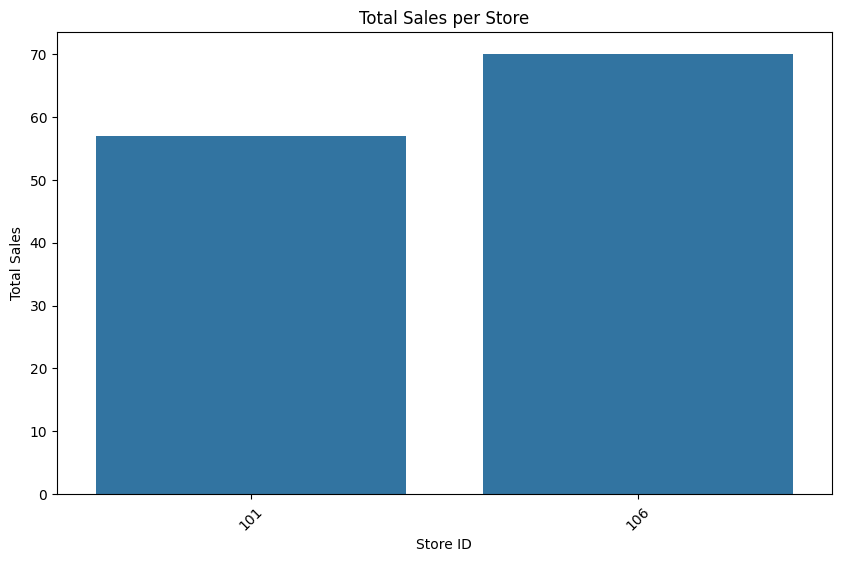

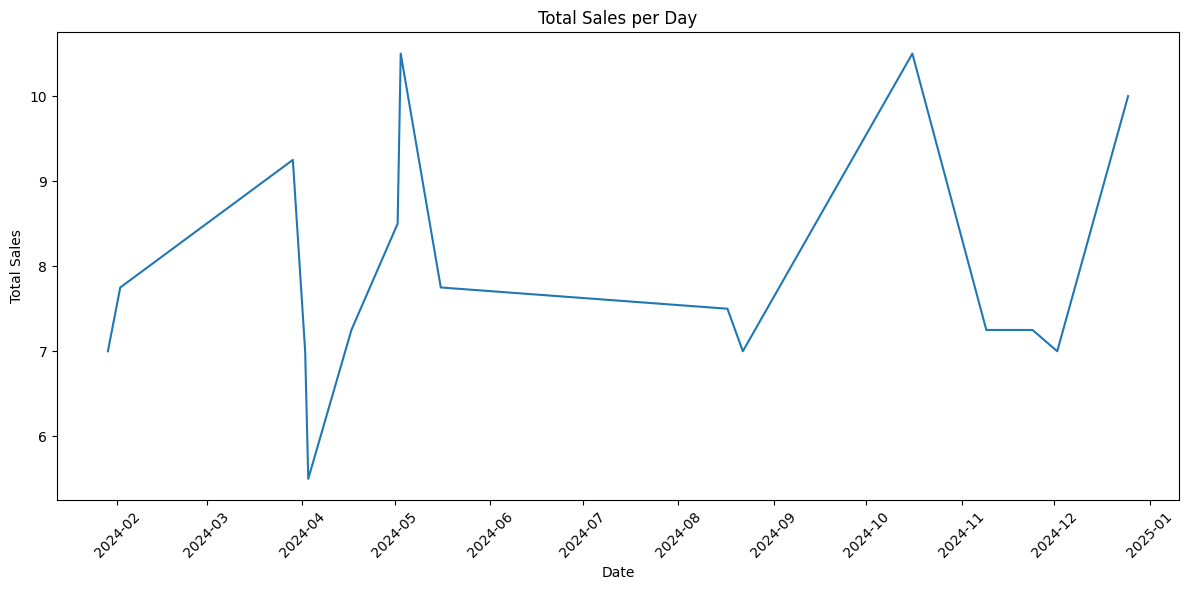

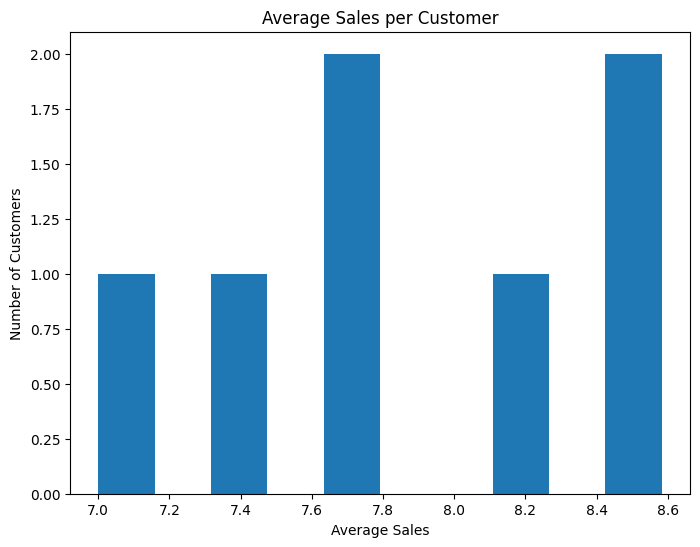

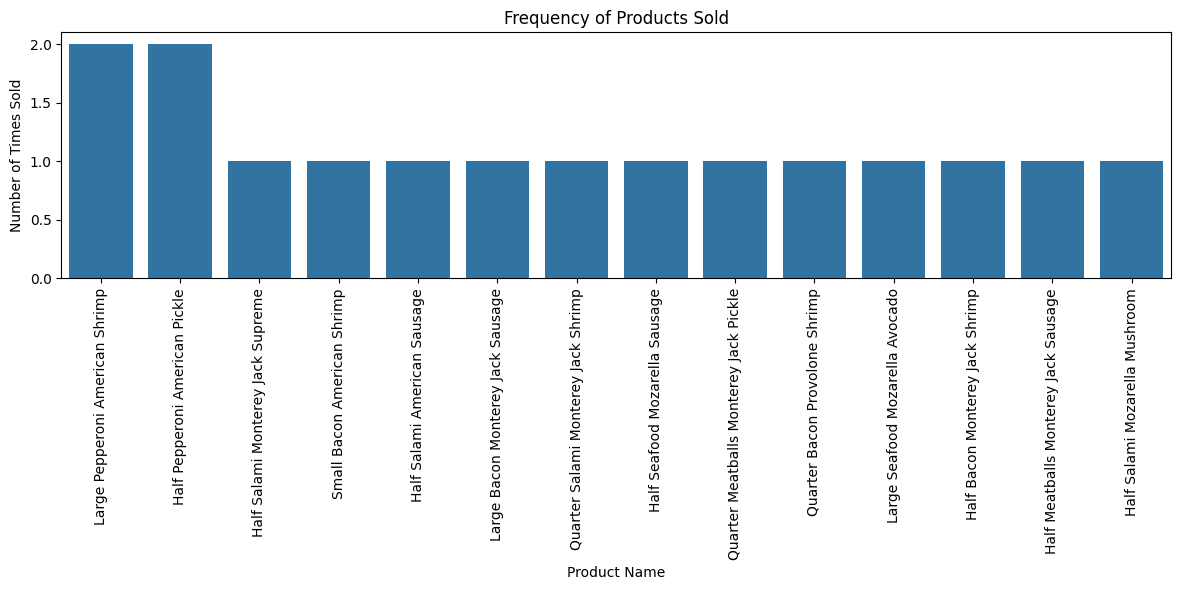

In [ ]:
# prompt: visualize it

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a pandas DataFrame.
file_path = '/content/Pizza_Pizza_sales_data.csv'
df = pd.read_csv(file_path)

# Convert 'Date Intro' to datetime objects
df['Date Intro'] = pd.to_datetime(df['Date Intro'])

# Calculate total sales per store
sales_per_store = df.groupby('StoreID')['Price of Product'].sum()

# Create a bar plot of sales per store
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_per_store.index, y=sales_per_store.values)
plt.title('Total Sales per Store')
plt.xlabel('Store ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


# Calculate total sales per day
sales_per_day = df.groupby('Date Intro')['Price of Product'].sum()

# Create a line plot of sales per day
plt.figure(figsize=(12, 6))
plt.plot(sales_per_day.index, sales_per_day.values)
plt.title('Total Sales per Day')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


# Calculate the average sales per customer
average_sales_per_customer = df.groupby('CustomerID')['Price of Product'].mean()

# Create a histogram of average sales per customer
plt.figure(figsize=(8, 6))
plt.hist(average_sales_per_customer, bins=10)
plt.title('Average Sales per Customer')
plt.xlabel('Average Sales')
plt.ylabel('Number of Customers')
plt.show()

# Calculate the frequency of each product sold
product_frequency = df['Product Name'].value_counts()

# Create a bar plot of product frequency
plt.figure(figsize=(12, 6))
sns.barplot(x=product_frequency.index, y=product_frequency.values)
plt.title('Frequency of Products Sold')
plt.xlabel('Product Name')
plt.ylabel('Number of Times Sold')
plt.xticks(rotation=90)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()